In [123]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [124]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


# Compute Saved Face Descriptions

In [125]:
img_paths = {
    'Yujaesuk': 'train_img/yujae.jpg',
    'Jungjunha': 'train_img/jungjun.jpg',
    'Parkmyungsu': 'train_img/parkmyung.jpg',
     'Haha': 'train_img/haha2.jpg',
     'Junghyungdon': 'train_img/junghyung.jpg',
    'Nohonchul': 'train_img/nohong.jpg',
    'Gil': 'train_img/gil.jpg'
}

descs = {
    'Yujaesuk': None ,
    'Jungjunha': None,
    'Parkmyungsu': None,
     'Haha':  None,
     'Junghyungdon': None,
    'Nohonchul':  None,
    'Gil': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('train_img/descs7.npy', descs)
print(descs)

{'Yujaesuk': array([-1.27827138e-01,  7.46198297e-02,  1.18345931e-01,  3.53568271e-02,
       -6.76897615e-02, -1.63146742e-02, -7.65689462e-02, -1.65453017e-01,
        4.76473160e-02, -3.78714949e-02,  2.33269796e-01, -3.24881449e-02,
       -2.41581619e-01, -7.33230188e-02, -7.99626410e-02,  1.65205777e-01,
       -1.14794888e-01, -9.69861522e-02, -5.20252585e-02,  3.47103924e-04,
        7.09021837e-02,  4.07775939e-02,  8.11204165e-02, -1.00336522e-02,
       -6.14135042e-02, -3.36233258e-01, -1.02093443e-01, -1.10822678e-01,
        5.97661547e-03,  2.80843135e-02, -5.58079854e-02,  2.34444067e-02,
       -9.63698328e-02, -1.18108764e-02,  9.72194299e-02,  6.73909858e-02,
       -1.42491758e-02, -5.74735776e-02,  2.38053486e-01, -1.51661178e-02,
       -2.37855166e-01,  4.28346135e-02,  8.70896205e-02,  2.19807848e-01,
        2.34775767e-01,  5.33388257e-02,  7.72184730e-02, -1.44182473e-01,
        1.26610577e-01, -1.53375402e-01,  5.70991896e-02,  1.71124116e-01,
        1.00

# Compute Input

In [126]:
img_bgr = cv2.imread('train_img/sample1.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

# Visualize Output

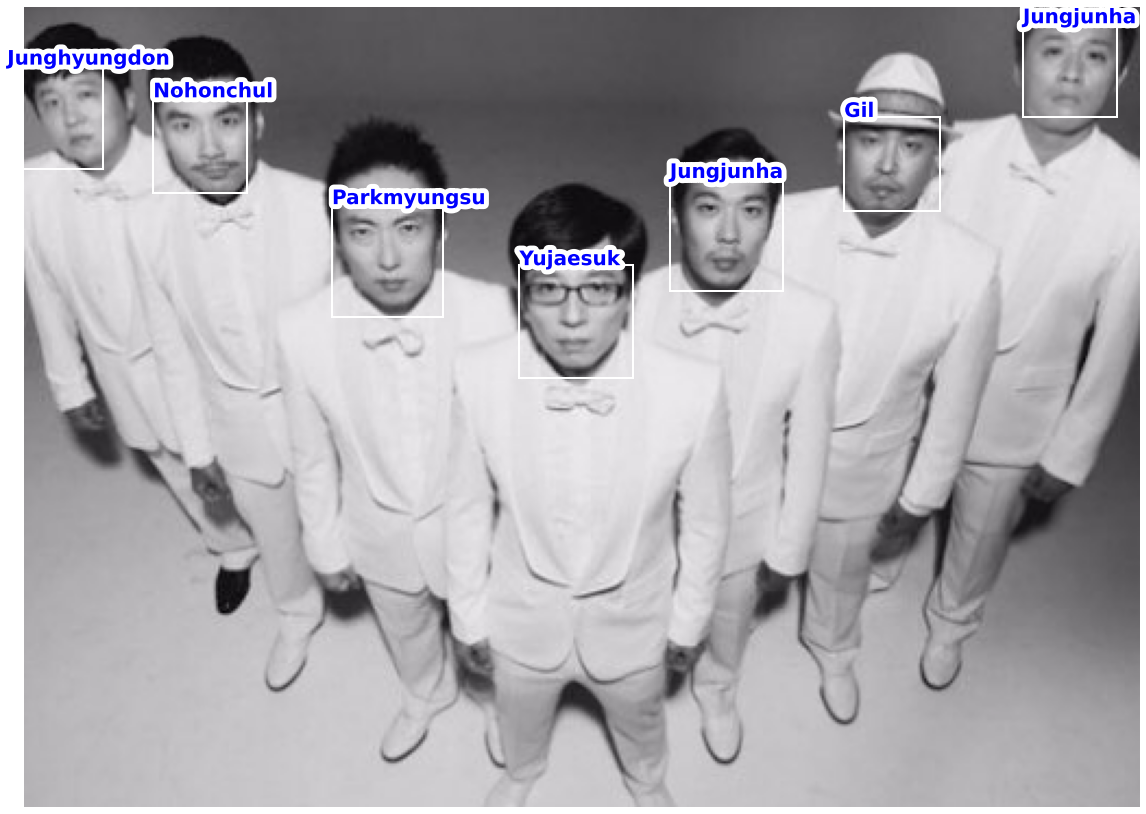

In [129]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.485: # 사진마다 최적의 값이 다를듭
            # sample1 = 0.485
            # smaple2 = 0.4
            # members = 0.4
            # group = 
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=20, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output1.png')
plt.show()